In [27]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

def init():
    dfs = pd.read_csv('data/Neuro279_Syn.csv', index_col=0)
    dfg = pd.read_csv('data/Neuro279_EJ.csv', index_col=0)
    return dfs, dfg

def traces(i):
    """Get traces of dataset @i"""
    return pd.read_csv('data/WBI%s.csv' % i, index_col=0)


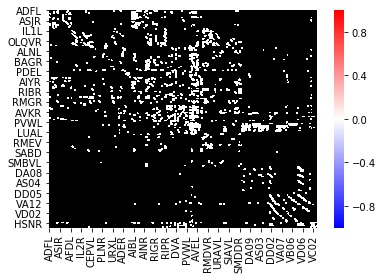

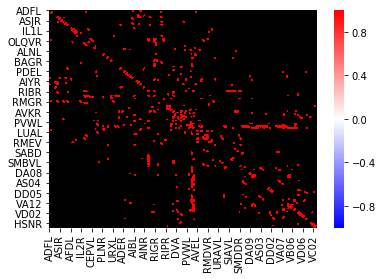

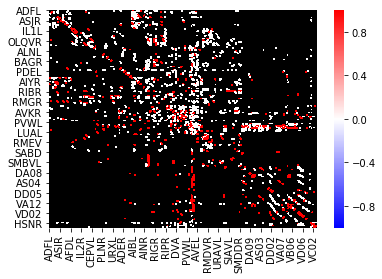

In [114]:
def nanify(df, val=0):
    df[df == 0] = np.nan
    df[df.notna()] = val
    return df
    
def plot_conns(df):
    g = sns.heatmap(df, cmap='bwr', vmin=-1, vmax=1)
    g.set_facecolor('k')
    plt.show()

dfs, dfg = init()
dfall = (dfs > 0) + 2*(dfg > 0) - 1
dfall[dfall == -1] = np.nan
dfall[dfall > 1] = 1
alles = dfall.copy()
syns = nanify(dfs)
dfsyn = syns.copy()
gaps = nanify(dfg, 1)
plot_conns(syns)
plot_conns(gaps)
plot_conns(alles)

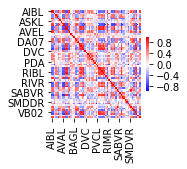

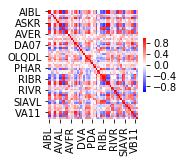

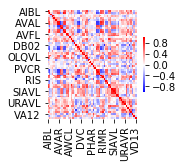

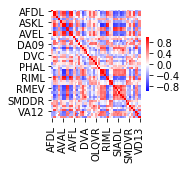

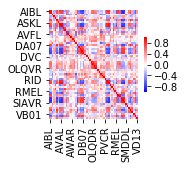

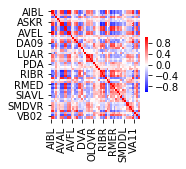

In [115]:
def add_val(i):
    t0 = traces(i)
    labs0 = [n for n in t0.columns if any(c.isalpha() for c in n) and n not in ['bullshit', 'bullshit.1', 'PVCR.1', 'AS10.1', 'VD13.1']]
    corr0 = t0[labs0].corr()
    for i, n1 in enumerate(corr0.index):
        for n2 in corr0.index[i:]:
            if dfsyn.loc[n1,n2] == 0:
                dfsyn.loc[n1,n2] = corr0.loc[n1,n2]         
                dfall.loc[n1,n2] = corr0.loc[n1,n2]  
    plt.figure(figsize=(2,2))
    sns.heatmap(corr0, cmap='bwr', square=False, vmax=1, vmin=-1, cbar_kws={"shrink": .5})
    plt.show()

for i in range(6):
    add_val(i)

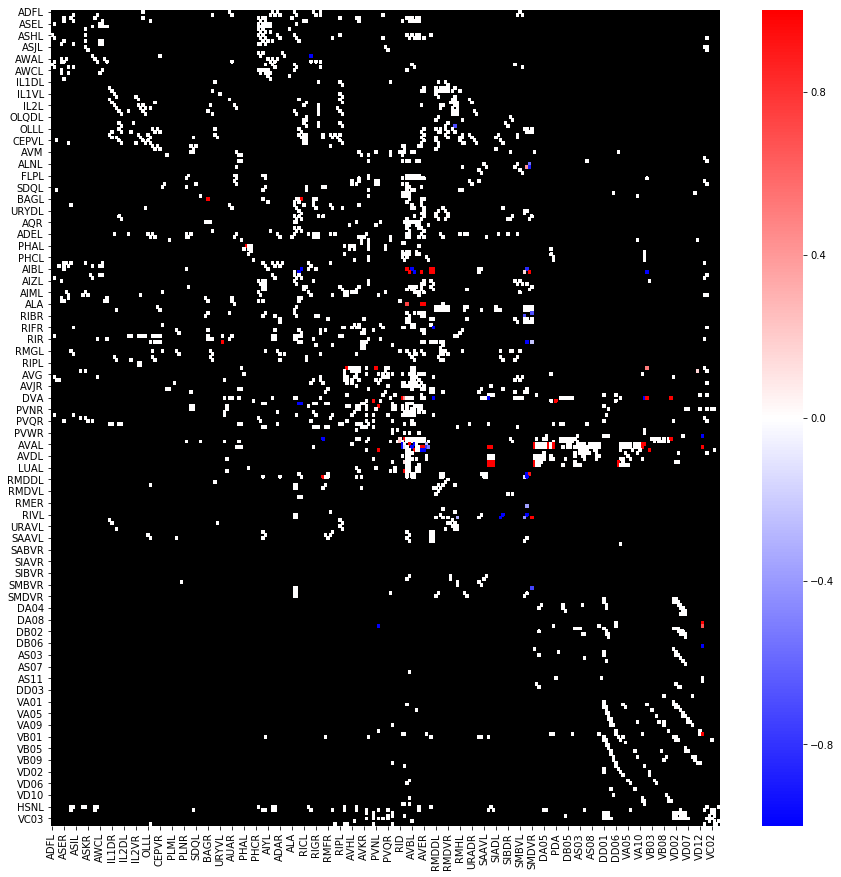

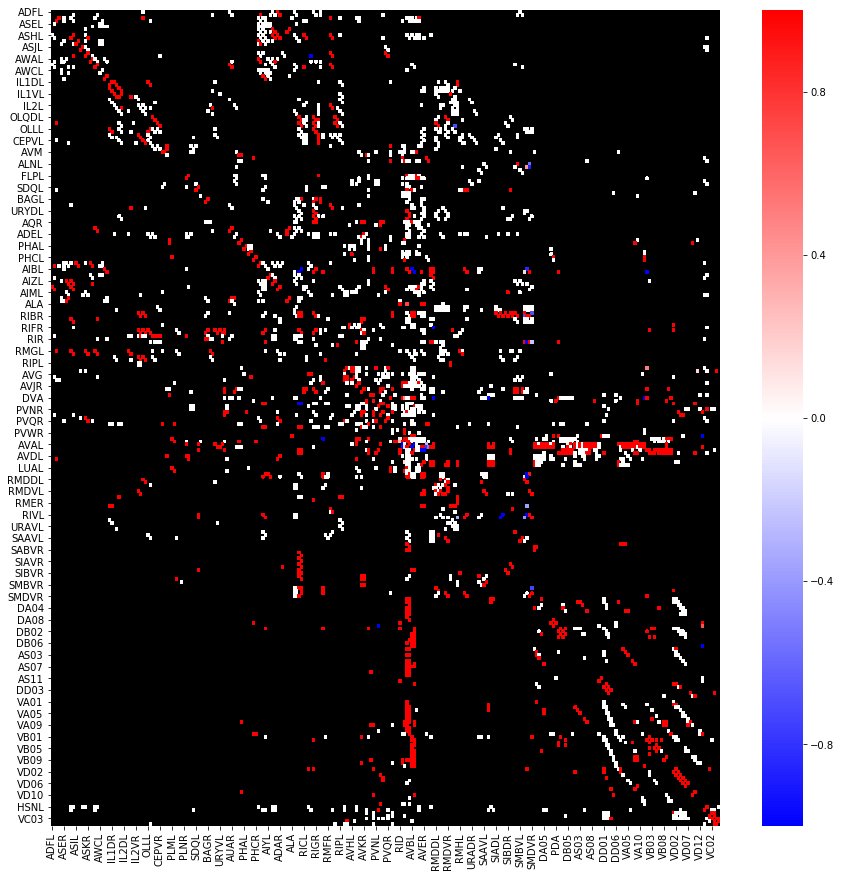

In [117]:
    
gtg = gaps.copy()
gtg[gtg.isna()] = 0
plt.figure(figsize=(15,15))
plot_conns((dfsyn - syns) * 5)
plt.figure(figsize=(15,15))
plot_conns(dfall * 5)